<a href="https://colab.research.google.com/github/Quantum-Legend/DL-and-HPC/blob/main/DL_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression by using Deep Neural network

Implement Boston housing price prediction problem by Linear regression using Deep Neural network. Use Boston House price prediction dataset.

Link to dataset: https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data

In [ ]:
# Download the dataset from Kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/the-boston-houseprice-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-boston-houseprice-data


Import the libraries
- Pandas for data processing
- Numpy for numerical computing
- sklearn for machine learning

Then, read the boston house prices dataset

In [ ]:
import numpy as np
import pandas as pd
import sklearn
boston = pd.read_csv(path + '/boston.csv')

## Exploratory Data Analysis

### View the boston dataset.

In [ ]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


Input features in order:
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per $10,000 [$/10k]
11. PTRATIO: pupil-teacher ratio by town
12. B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population

Output variable:
1. MEDV: Median value of owner-occupied homes in $1000's [k$]

In [ ]:
print(boston.shape)

(506, 14)


### Check the null values in the dataset

In [ ]:
boston.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


> There are no null values

### Check the statistics of the dataset

In [ ]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


> In the CRIM column, max value is shown as 88.97, but 75% of the values are below 3.6771 and mean is 3.6135. This means that max value is an outlier, or there are outliers present in the column. This is also apparent in ZN column.



In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Check the distribution of the target variable

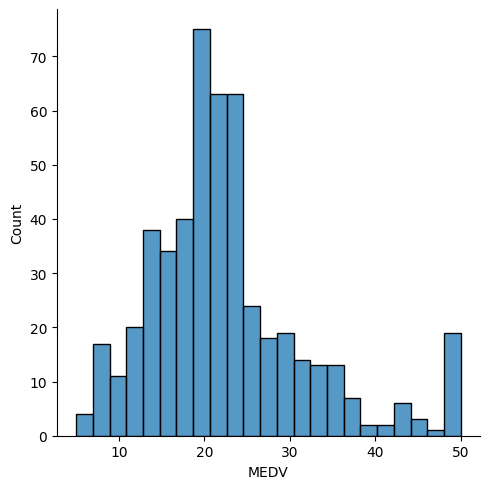

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(boston["MEDV"])
plt.show()

> The distribution seems normal, had not the data being normal we would have performed log transformation or taken the square root of the data to make the data normal. <br> Normal distribution is need for the machine learning for better predictibility of the model.

### Check distribution using box plot.

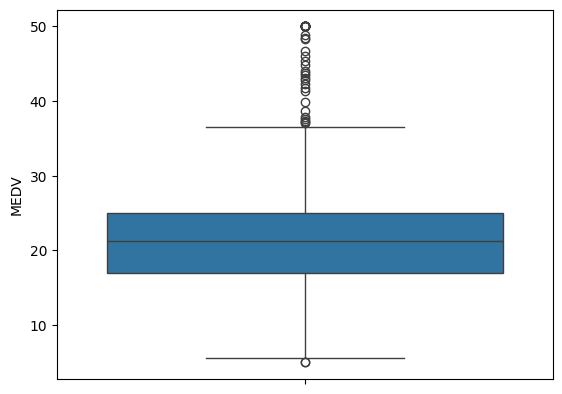

In [ ]:
sns.boxplot(boston["MEDV"])
plt.show()

### Check the correlation of the independent feature with the dependent feature
Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.

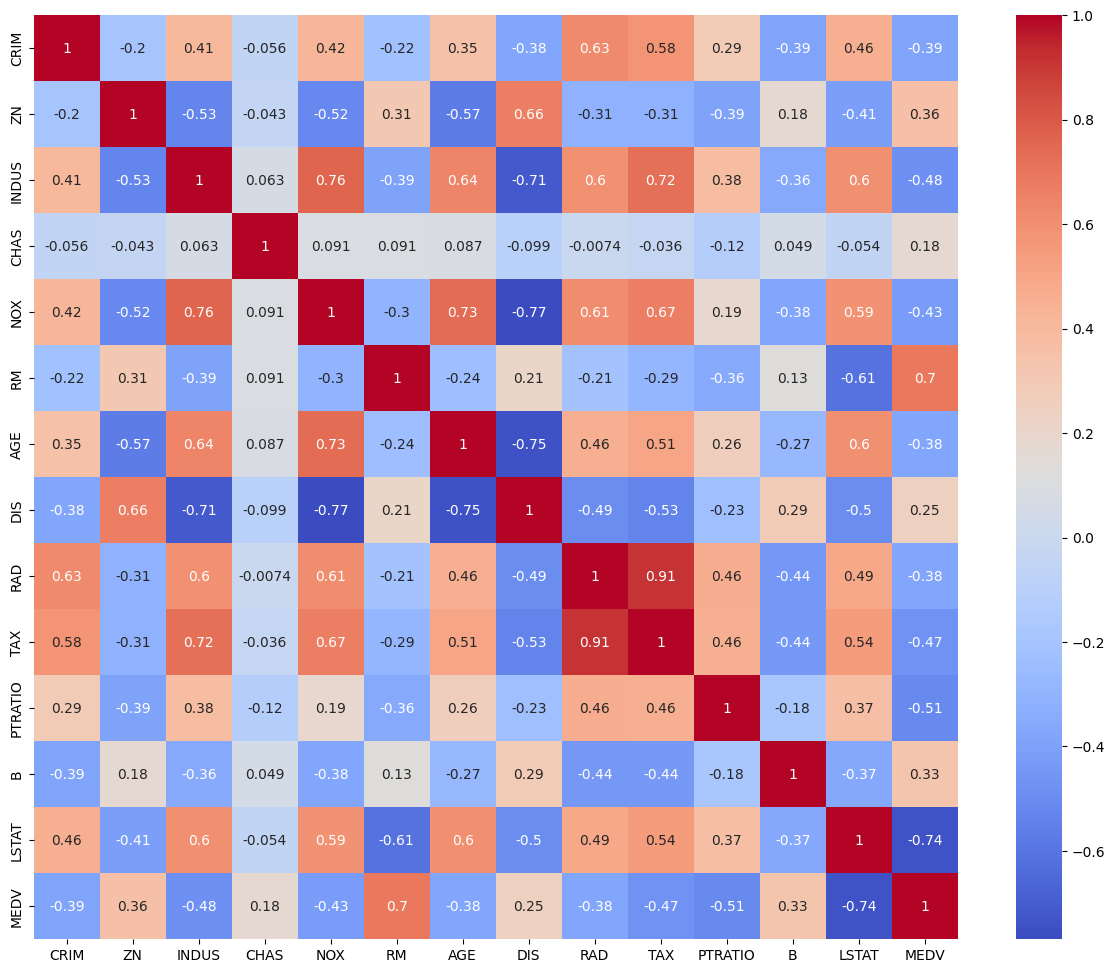

In [ ]:
boston_correlation = boston.corr()
fig, axes = plt.subplots(figsize=(15,12))
sns.heatmap(boston_correlation, square=True, annot=True, cmap="coolwarm")
plt.show()

> By looking at the correlation plot LSAT is negatively correlated with -0.75, RM is positively correlated with 0.7 and PTRATIO is correlated negatively with -0.51, to the target feature MEDV

### Check the scatterplot with the most correlated features.

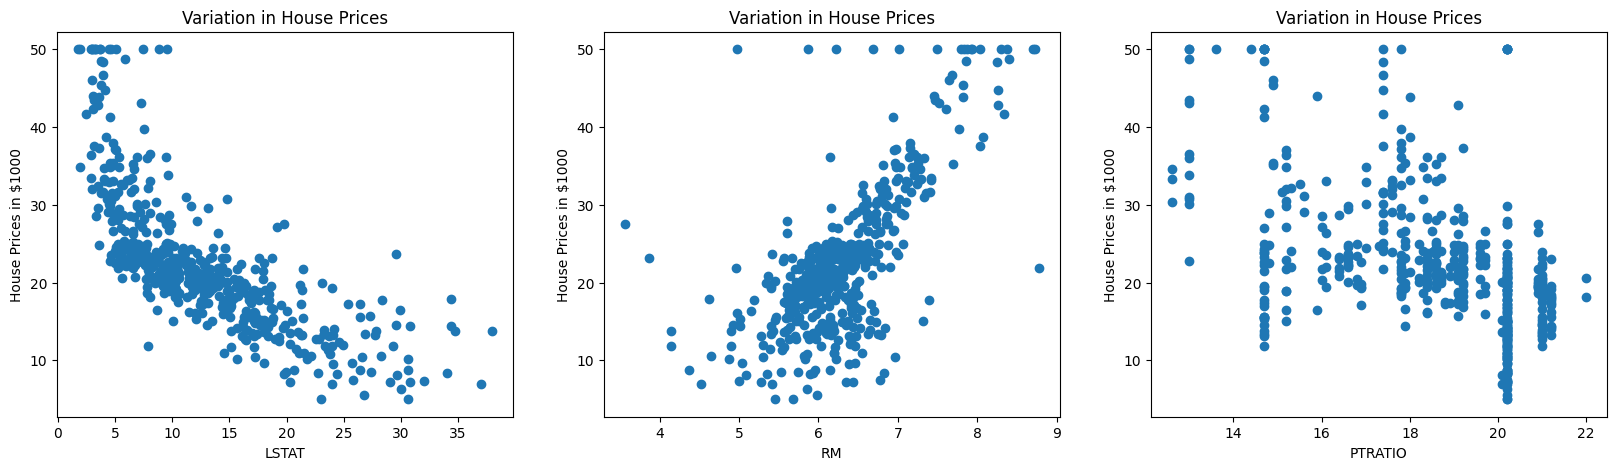

In [ ]:
plt.figure(figsize=(20,5))
features = ["LSTAT", "RM", "PTRATIO"]
for i, column in enumerate(features):
  plt.subplot(1, len(features), i+1)
  x = boston[column]
  y = boston["MEDV"]
  plt.scatter(x, y, marker='o')
  plt.title("Variation in House Prices")
  plt.xlabel(column)
  plt.ylabel("House Prices in $1000")
plt.show()

## Feature Engineering

### Split the dependent and independent feature

In [ ]:
from sklearn.model_selection import train_test_split
X = boston[["LSTAT", "RM", "PTRATIO"]]
X = boston.iloc[ :, : -1]
y = boston["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Normalization

In [ ]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

## Model Training

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [ ]:
y_pred_lr = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Root Mean Squared Error is: " + str(rmse))
r2 = r2_score(y_test, y_pred_lr)
print("R2 Score is: " + str(r2))

Root Mean Squared Error is: 4.928602182665336
R2 Score is: 0.668759493535632


### Neural Network

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Creating the model

Due to the small amount of presented data in this dataset, we must be careful not to create an overly complex model, which could lead to overfitting our data. For this, we are going to adopt an architecture based on two Dense layers, the first with 128 and the second with 64 neurons, both using a ReLU activation function.

In order to allow us to know if our model is properly learning, we will use a mean squared error loss
function and to report the performance of it we will adopt the mean average error metric.

In [ ]:
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Sequential

model = Sequential()
model.add(Input(shape=(13,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', metrics=['mae'], loss='mean_squared_error')

In [ ]:
from keras.utils import plot_model
input_layer = model.layers[0].input_spec
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 631.1277 - mae: 23.0212 - val_loss: 495.9643 - val_mae: 20.7771
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 569.2533 - mae: 21.7339 - val_loss: 415.1171 - val_mae: 18.7779
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 454.6837 - mae: 19.0227 - val_loss: 260.0417 - val_mae: 14.1767
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 205.8446 - mae: 12.4076 - val_loss: 79.7616 - val_mae: 6.2283
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 85.5095 - mae: 7.2256 - val_loss: 67.1596 - val_mae: 5.3254
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 52.3663 - mae: 5.3165 - val_loss: 62.8534 - val_mae: 4.8425
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 33.2331 - mae: 4.0988 - val_loss: 57.0135 - val_mae: 4.9301
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 22.4386 - mae: 3.5873 - val_loss: 57.9553 - val_mae: 5.0026
Epoch 9/100
12/12 ━━━━━━━━━━

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'], name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_loss'], name='Validation'))
fig.update_layout(title='Loss Curves', height=500, width=700, xaxis_title='Epoch', yaxis_title='Loss')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace((go.Scattergl(y=history.history['val_mae'], name='Validation')))
fig.update_layout(title='Mean Absolute Error', height=500, width=700, xaxis_title='Epoch', yaxis_title='MAE')
fig.show()

### Model Evaluation

In [ ]:
y_pred_nn = model.predict(X_test)
mse_nn, mae_nn = model.evaluate(X_test, y_test)
r2_nn = r2_score(y_test, y_pred_nn)
rmse_nn = (np.sqrt(mean_squared_error(y_test, y_pred_nn)))
print("Mean Squared Error is: " + str(mse_nn))
print("Mean Absolute Error is: " + str(mae_nn))
print("R2 Score is: " + str(r2_nn))
print("Root Mean Squared Error is: " + str(rmse_nn))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.7549 - mae: 2.0729
Mean Squared Error is: 11.493805885314941
Mean Absolute Error is: 2.2503530979156494
R2 Score is: 0.8432672449400679
Root Mean Squared Error is: 3.39025159445211


### Comparison with Traditional approach

In [ ]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = (np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Mean Squared Error of Linear Regression is: " + str(mse_lr))
print("Mean Absolute Error of Linear Regression is: " + str(mae_lr))
print("R2 Score of Linear Regression is: " + str(r2_lr))
print("Root Mean Squared Error of Linear Regression is: " + str(rmse_lr))

Mean Squared Error of Linear Regression is: 24.291119474973517
Mean Absolute Error of Linear Regression is: 3.1890919658878483
R2 Score of Linear Regression is: 0.668759493535632
Root Mean Squared Error of Linear Regression is: 4.928602182665336


### Make Predictions on new data

In [ ]:
new_data = sklearn.preprocessing.StandardScaler().fit_transform(([[0.1, 10.0, 5.0, 0, 0.4, 6.0, 50, 6.0, 1, 400, 20, 300, 10]]))
prediction = model.predict(new_data)
print("Predicted house price: ", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted house price:  [[11.207494]]
